In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE


In [3]:
# importing the dataset
credit_data =pd.read_csv('creditcard.csv')
credit_data.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [5]:
# checking the shape
credit_data.shape

(284807, 31)

In [7]:
# checking the information of the dataset
credit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# checking if there is missing value in the dataset
credit_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# checking if there is duplicated value in the dataset
credit_data.duplicated().sum()

1081

In [12]:
# droping the duplicated value
credit_data.drop_duplicates(inplace=True)

In [13]:
# checking back the duplicated value in the dataset
credit_data.duplicated().sum()

0

In [14]:
# checking the names of the columns
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [15]:
# checking the statiscal view of the dataset
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


In [17]:
# checking the correlation of the dataset
credit_data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


In [18]:
#droping the time column
credit_data.drop('Time',axis=1,inplace=True)

In [20]:
# figuring out the most correlated feature among the variables
credit_column =credit_data.corr()['Class'].apply(abs).sort_values(ascending=False)

In [21]:
credit_selected_column= credit_column[:23].index

In [23]:
credit=list(credit_selected_column)

In [26]:
credit

['Class',
 'V17',
 'V14',
 'V12',
 'V10',
 'V16',
 'V3',
 'V7',
 'V11',
 'V4',
 'V18',
 'V1',
 'V9',
 'V5',
 'V2',
 'V6',
 'V19',
 'V8',
 'V21',
 'V27',
 'V20',
 'V28',
 'V24']

In [29]:
# selecting the most correlated column to the target variable
credit_card =credit_data[credit]

In [30]:
credit_card

,Class,V17,V14,V12,V10,V16,V3,V7,V11,V4,...,V5,V2,V6,V19,V8,V21,V27,V20,V28,V24
0,0,0.207971,-0.311169,-0.617801,0.090794,-0.470401,2.536347,0.239599,-0.551600,1.378155,...,-0.338321,-0.072781,0.462388,0.403993,0.098698,-0.018307,0.133558,0.251412,-0.021053,0.066928
1,0,-0.114805,-0.143772,1.065235,-0.166974,0.463917,0.166480,-0.078803,1.612727,0.448154,...,0.060018,0.266151,-0.082361,-0.145783,0.085102,-0.225775,-0.008983,-0.069083,0.014724,-0.339846
2,0,1.109969,-0.165946,0.066084,0.207643,-2.890083,1.773209,0.791461,0.624501,0.379780,...,-0.503198,-1.340163,1.800499,-2.261857,0.247676,0.247998,-0.055353,0.524980,-0.059752,-0.689281
3,0,-0.684093,-0.287924,0.178228,-0.054952,-1.059647,1.792993,0.237609,-0.226487,-0.863291,...,-0.010309,-0.185226,1.247203,-1.232622,0.377436,-0.108300,0.062723,-0.208038,0.061458,-1.175575
4,0,-0.237033,-1.119670,0.538196,0.753074,-0.451449,1.548718,0.592941,-0.822843,0.403034,...,-0.407193,0.877737,0.095921,0.803487,-0.270533,-0.009431,0.219422,0.408542,0.215153,0.141267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0,1.991691,4.626942,2.711941,4.356170,1.107641,-9.834783,-4.918215,-1.593105,-2.066656,...,-5.364473,10.071785,-2.606837,-0.682920,7.305334,0.213454,0.943651,1.475829,0.823731,-0.509348
284803,0,-0.025693,-0.675143,0.915802,-0.975926,-0.711757,2.035030,0.024330,-0.150189,-0.738589,...,0.868229,-0.055080,1.058415,-1.545556,0.294869,0.214205,0.068472,0.059616,-0.053527,-1.016226
284804,0,0.313502,-0.510602,0.063119,-0.484782,0.140716,-3.249640,-0.296827,0.411614,-0.557828,...,2.630515,-0.301254,3.031260,-0.577252,0.708417,0.232045,0.004455,0.001396,-0.026561,0.640134
284805,0,0.509928,0.449624,-0.962886,-0.399126,-0.608577,0.702510,-0.686180,-1.933849,0.689799,...,-0.377961,0.530483,0.623708,2.897849,0.679145,0.265245,0.108821,0.127434,0.104533,0.123205


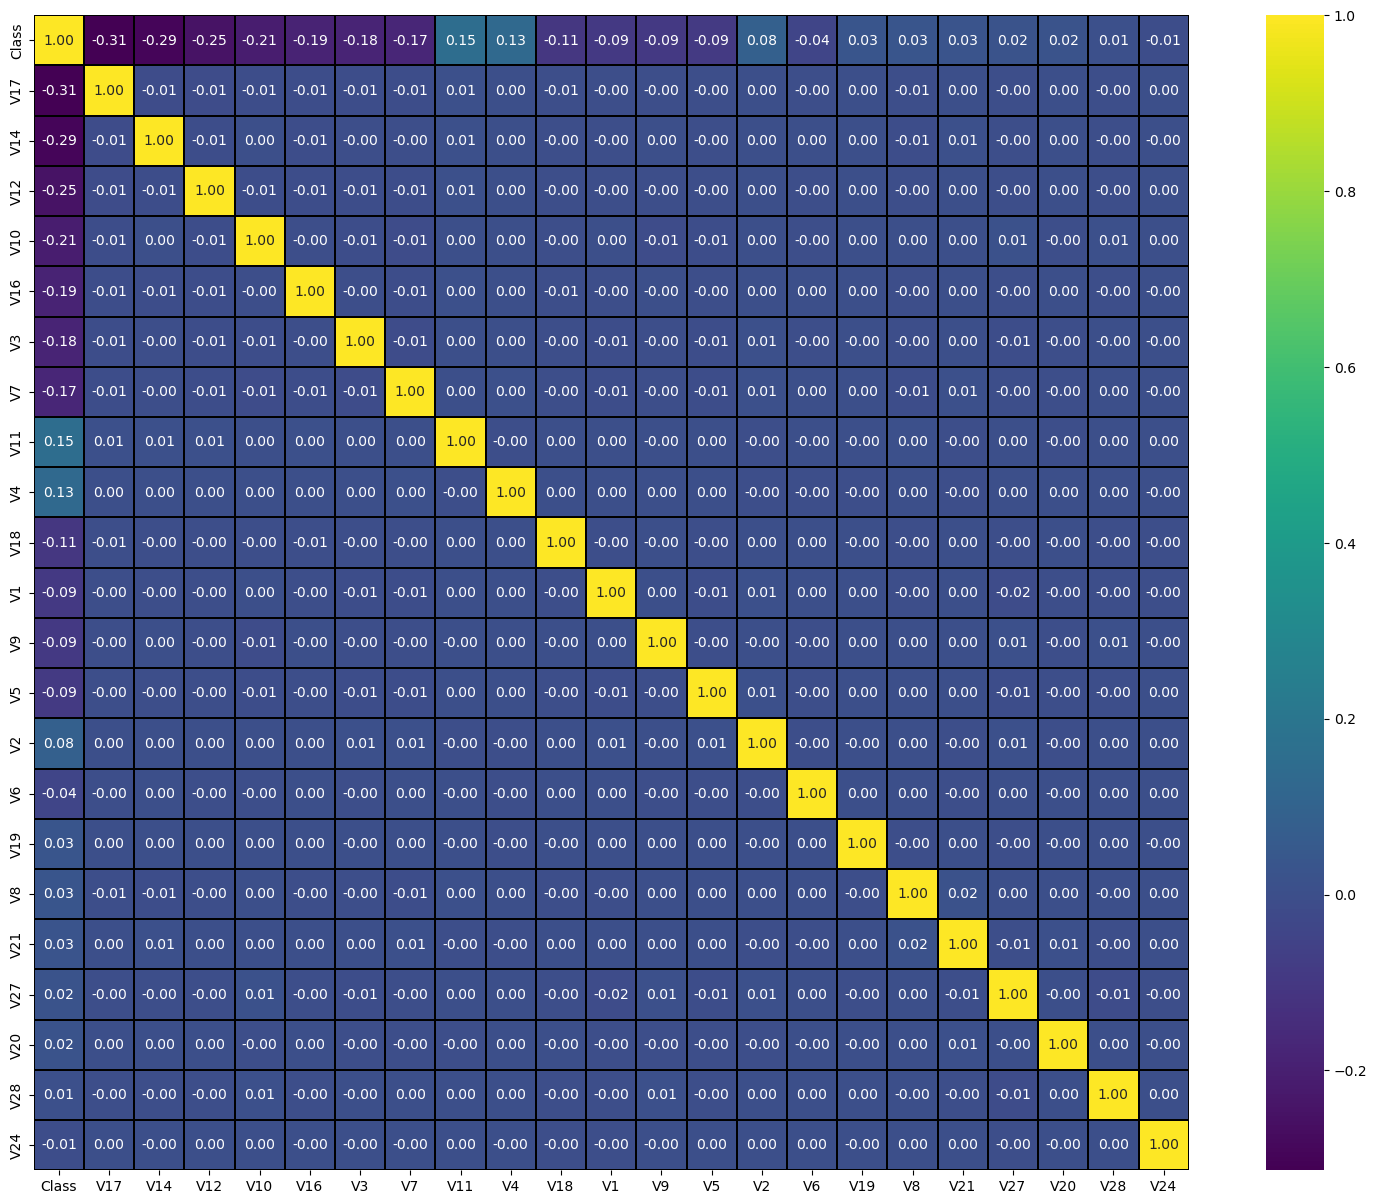

In [34]:
# visualizing the correlation
plt.figure(figsize=(20,15))
sns.heatmap(credit_card.corr(),annot=True,cmap='viridis',linewidths=0.1,linecolor='black',fmt='.2f',square=True)
plt.show()

In [37]:
# Distribution of the target variables
credit_card['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

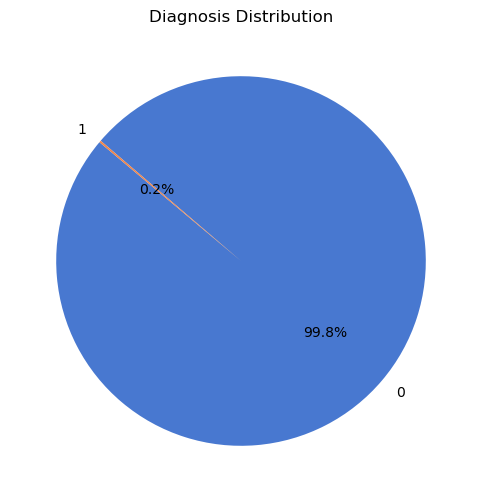

In [39]:
# visualizing the target variable using pie chart
categories=[0,1]
count=credit_card['Class'].value_counts().to_list()
colors=sns.color_palette('muted')
plt.figure(figsize=(6,6))
plt.pie(x=count,labels=categories,autopct='%1.1f%%',colors=colors,startangle=140)
plt.title('Diagnosis Distribution')
plt.show()

In [40]:
# spliting the data into predictor and target variables
X= credit_card.drop('Class',axis=1)
y= credit_card['Class']

In [41]:
# spliting the dataset into train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [42]:
# since there is imblance in the distribution of the target ,then we use SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [43]:
# Standardize the features
scaled = StandardScaler()
X_train_scaled = scaled.fit_transform(X_smote)
X_test_scaled = scaled.transform(X_test)

In [140]:
# instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC()
}

In [53]:
# Decision Tree 
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_smote)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_classification = classification_report(y_test, dt_pred)

In [57]:
dt_accuracy

0.997662069127564

In [59]:
print(dt_classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.38      0.75      0.50       134

    accuracy                           1.00     85118
   macro avg       0.69      0.88      0.75     85118
weighted avg       1.00      1.00      1.00     85118

